# Machine Learning Classification Project - Stroke Dataset

**Student name**: Jordana Tepper, Troy Hendrickson, Viktoria Szontagh  
**Student pace**: Full Time  
**Instructor name**: Joseph Mata  

In [1]:
#Basics
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from sklearn.metrics import plot_roc_curve #depreciated
from sklearn.metrics import RocCurveDisplay

%matplotlib inline

# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn import set_config
from sklearn.metrics import recall_score
set_config(display= 'diagram')
from sklearn.metrics import roc_curve



## Data Understanding

In [2]:
# Loading in the dataset
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Looking at the general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are 5110 rows and 12 columns in the dataset with variables of the following Datatypes: int, object, and float.

The categorical columns (Datatype 'object') 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'.

Despite 'hypertension', 'heart_disease', and 'stroke' being type 'int', we know that these are actually categorical columns, as well.

Furthermore, there appears to be missing values in the 'bmi' column.

In [4]:
# Looking at basic metrics of the dataset (for the numerical columns)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



Insights about Outliers:
* There are outliers in the age column with a minimum value of 0.08 - indicating that this dataset includes children.
* There are outliers in the 'avg_glucose_level' column with a maximum of 271.74
* There are outliers in the 'bmi' column with a maximum of 97.6

In [5]:
# Looking at basic metrics of the dataset (for the categorical columns)
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Insights:
* More females than males in the dataset
* The majority of the individuals in this dataset have been married
* Most of the individuals in this dataset work in a field categorized as 'private'
* Most of the individuals in this dataset live in an urban area
* The most prevalent value in 'smoking_status' is 'never smoked'

In [6]:
# Further investigation of the missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Based on information above, there are 201 missing values in the 'bmi' column and no missing values in the other columns.

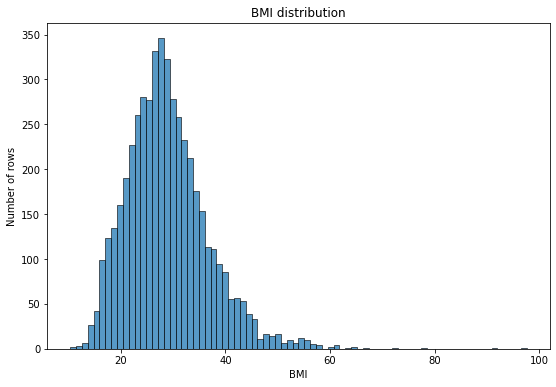

In [7]:
# Distribution of the 'bmi' column
fig ,ax = plt.subplots(figsize = (9,6))
sns.histplot(df['bmi'])
ax.set_title('BMI distribution')
ax.set_xlabel('BMI')
ax.set_ylabel('Number of rows')
plt.show()

The 'bmi' column seems a little skewed to the right, so we will fill in the missing values with the median using Simple Imputer after we Train Test Split.

In [8]:
# Checking the value counts of the 'gender' column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

There is only one line were the gender is 'other', so we will drop this row during our Data Preparation.

In [9]:
# Checking the value counts of the 'hyperstension' column
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [10]:
# Checking the value counts of the 'heart_disease' column
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [11]:
# Checking the value counts of the 'ever_married' column
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
# Checking the value counts of the 'work_type' column
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
# Checking the value counts of the 'Residence_type' column
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [14]:
# Checking the value counts of the 'smoking_status' column
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

There are 1544 indices in the dataset where the smoking status is 'Unknown'. This need to be further investigated.

In [15]:
# Checking the smoking status for 'unknown' and age below 13
df[(df['smoking_status'] == 'Unknown') & (df['age'] < 13)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8.00,0,0,No,Private,Urban,110.89,17.6,Unknown,0
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
291,11014,Male,4.00,0,0,No,children,Rural,79.17,20.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5078,27446,Female,8.00,0,0,No,children,Urban,76.31,15.5,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0


Based on the global statistic for smoking in children, we will later change the value in 'smoking_status' from 'Unknown' to 'never smoked' for those rows the where the age is below 13 years old.

In [16]:
# Distribution of stroke
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In most of the cases, 4861 indices, the patient had no history of a stroke. 

In 249 of the cases, the patient had a history of a stroke.


## Data Preparation

In [17]:
# Dropping the id column as we will not be working with this column
df.drop('id', axis=1, inplace=True)

In [18]:
# Dropping the row with gender 'other'
df.drop(df[df.gender == 'Other'].index, inplace = True)

In [19]:
# Reclassify those who are under 13 as never smoker
df.loc[((df['smoking_status'] == 'Unknown') & (df['age'] < 13)), 'smoking_status'] = 'never smoked'

In [20]:
# Checking to see if the code above worked
df['smoking_status'].value_counts()

never smoked       2439
Unknown             997
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

Based on the values in the 'avg_glucose_level' column, we will assume that the glucose testing was done postprandial (after eating).

* A postprandial blood sugar level of less than 70 mg/dL indicates hypoglycemia.

* A postprandial blood sugar level of greater than or equal to 70 mg/dL and less than or equal to 140 mg/dL indicates normal glucose levels.

* A postprandial blood sugar level of greater than 140 mg/dL and less than or equal to 200 indicates pre-diabetes.

* A postprandial blood sugar level of greater than 200 indicates diabetes.

Below, we add a new column and categorize the data accordingly.

In [21]:
# Adding new column to categorize the glucose level
df.loc[df['avg_glucose_level'] < 70, 'blood_sugar_cat'] = 'hypoglycemia'
df.loc[(df['avg_glucose_level'] >= 70) & (df['avg_glucose_level'] <= 140), 'blood_sugar_cat'] = 'normal'
df.loc[(df['avg_glucose_level'] > 140) & (df['avg_glucose_level'] <= 200), 'blood_sugar_cat'] = 'pre-diabetic'
df.loc[df['avg_glucose_level'] > 200, 'blood_sugar_cat'] = 'diabetic'

## Data Analysis

### Distribution of ages among those who have had a stroke

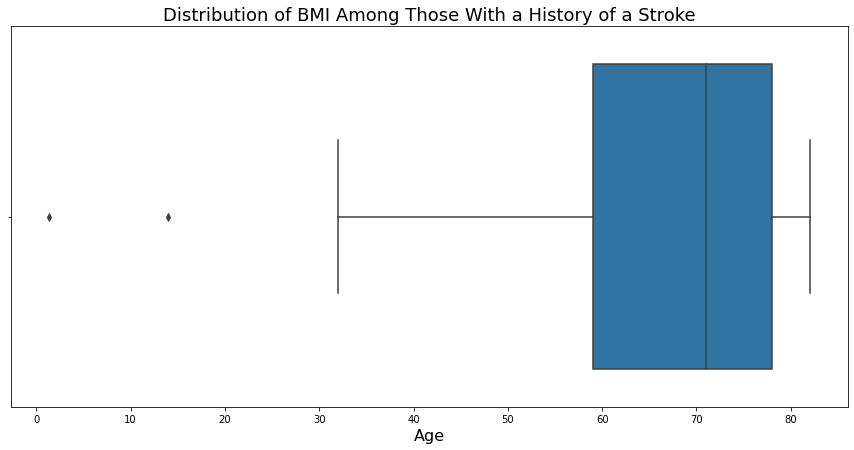

In [22]:
# Making a box plot to show the distributions of age for those who have had a stroke
stroke_yes = df.loc[df['stroke'] == 1]
fig, ax = plt.subplots(figsize = (15, 7))
fig = sns.boxplot(x=stroke_yes['age'])
ax.set_title('Distribution of BMI Among Those With a History of a Stroke', fontdict = { 'fontsize': 18});
ax.set_xlabel('Age', fontdict = { 'fontsize': 16});

### Distribution of BMI among those who have had a stroke

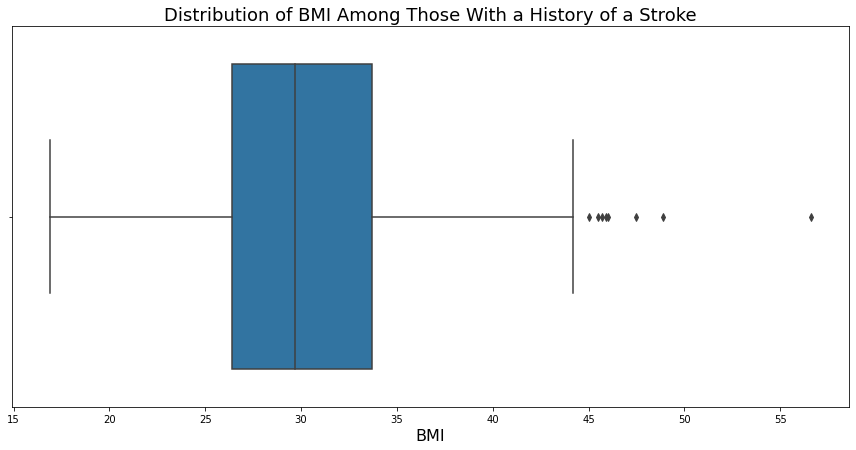

In [23]:
# Making a box plot to show the distributions of bmi for those who have had a stroke
fig, ax = plt.subplots(figsize = (15, 7))
fig = sns.boxplot(x=stroke_yes['bmi'])
ax.set_title('Distribution of BMI Among Those With a History of a Stroke', fontdict = { 'fontsize': 18});
ax.set_xlabel('BMI', fontdict = { 'fontsize': 16});

In [24]:
# stroke_and_ever_married_yes = df.loc[(df['ever_married'] == 'Yes') & (df['stroke'] == 1)]
# gender_mean_stroke_age = stroke_and_ever_married_yes[['age', 'gender']].groupby('gender').mean().squeeze().values
# fig, ax = plt.subplots(figsize = (15, 7))
# fig = sns.histplot(x=stroke_and_ever_married_yes['gender'])

## Modeling

**Due to the fact that we are interested in detecting stroke risk, a false negative is more costly than a false positive.**

**Therefore, the metric that matters most in our project is recall.**

In [25]:
# Train Test Split
X = df.drop(columns = 'stroke', axis = 1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

In [26]:
# Simple imputer for missing bmi values 
bmi_imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_train['bmi'] = bmi_imp.fit_transform(X_train[['bmi']])
X_test['bmi'] = bmi_imp.transform(X_test[['bmi']])

In [27]:
ohelist = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status', 'blood_sugar_cat']
oheX_train = pd.get_dummies(X_train[ohelist])
oheX_test =  pd.get_dummies(X_test[ohelist])
X_train = pd.concat([X_train, oheX_train], 1)
X_test = pd.concat([X_test, oheX_test], 1)

In [28]:
X_train.drop(columns = ['gender', 'ever_married', 'work_type', 
                        'Residence_type','smoking_status', 'blood_sugar_cat'], inplace = True)
X_test.drop(columns = ['gender', 'ever_married', 'work_type', 
                       'Residence_type','smoking_status', 'blood_sugar_cat'], inplace = True)

In [29]:
all_cols = X_train.columns
all_cols = all_cols.tolist()

In [30]:
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [31]:
y_train_sm.value_counts()

1    3888
0    3888
Name: stroke, dtype: int64

### Creating Column Transformer Pipeline

In [32]:
# Selecting the categorical columns
# cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 
#             'smoking_status']

In [33]:
# Selecting the numerical columns
#all_colsnum_cols = ['age', 'bmi', 'avg_glucose_level']

In [34]:
# Selecting the categorical columns were already encoded in the dataset
#pre_encoded_cols = ['hypertension', 'heart_disease']

In [35]:
#all_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 
            # 'smoking_status', 'age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']

In [36]:
# sm = SMOTENC(random_state=42, categorical_features=all_cols)

In [37]:
# X_traim_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [38]:
# Define categorical pipeline with one hot encoder and standard scaler
# cat_pipe = imbpipeline([('one_hot_enc', OneHotEncoder(sparse = False, drop = 'first')), 
#                      ('one_hot_norm', StandardScaler())])

# Define numeric pipeline with standard scaler

norm_pipe = Pipeline([('norm_pipe', StandardScaler())])

# Define pipeline that standard scales the categorical columns that were already encoded
#pre_encoded_pipe = imbpipeline([('pre_encoded_norm', StandardScaler())])

ct = ColumnTransformer(transformers = 
    [("norm_pipe", norm_pipe, all_cols)])

### Model 1: Baseline Model (Logistic Regression)

In [39]:
# Creating the baseline model pipeline
steps = [('preprocess', ct), ('model', LogisticRegression())]
baseline_pipeline = Pipeline(steps)

In [40]:
#X_train_sm, y_train_sm = pipeline_with_resampling.fit_resample(X_train, y_train)

In [41]:
baseline_model = baseline_pipeline.fit(X_train_sm, y_train_sm)

In [42]:
# Calculating y_pred
y_pred = baseline_pipeline.predict(X_test)

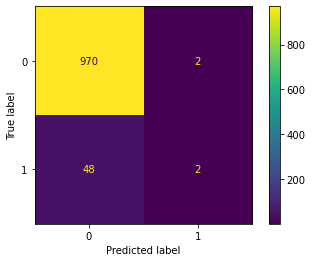

In [43]:
# Creating a confusion matrix
ConfusionMatrixDisplay.from_estimator(baseline_pipeline, X_test, y_test);

In [44]:
y_test.value_counts()

0    972
1     50
Name: stroke, dtype: int64

In [45]:
# Calculating recall score
model_1_recall = recall_score(y_test, y_pred)
model_1_recall

print('Baseline Model Recall Score:', model_1_recall)

Baseline Model Recall Score: 0.04


In [46]:
#y_prob = baseline_pipeline.predict_proba(X_test)

In [47]:
#fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

In [48]:
#thresholds[1::]

In [49]:
#thresh_df = pd.DataFrame({'threshold': thresholds,
                          #'tpr':  tpr, 'fpr': fpr}).iloc[1::, :]

In [50]:
#thresh_df['J_stat'] = thresh_df['tpr'] - thresh_df['fpr']

In [51]:
# max_selector = thresh_df.index == thresh_df['J_stat'].idxmax()

# optimal_thresh = thresh_df[max_selector]
# optimal_thresh

In [52]:
# fig, ax = plt.subplots()
# thresh_df.plot(x = 'fpr', y = 'tpr', ax = ax, label = 'ROC')
# optimal_thresh.plot.scatter(x = 'fpr', y = 'tpr', c ='r', s = 100, ax = ax, label = 'optimal' )
# plt.show()

In [53]:
# thresh = optimal_thresh['threshold'].values
# y_pred_with_threshold = (y_prob[:,1] >= thresh).astype(int)
# y_pred_with_threshold

In [54]:
# model_1_recall = recall_score(y_test, y_pred_with_threshold)
# model_1_recall

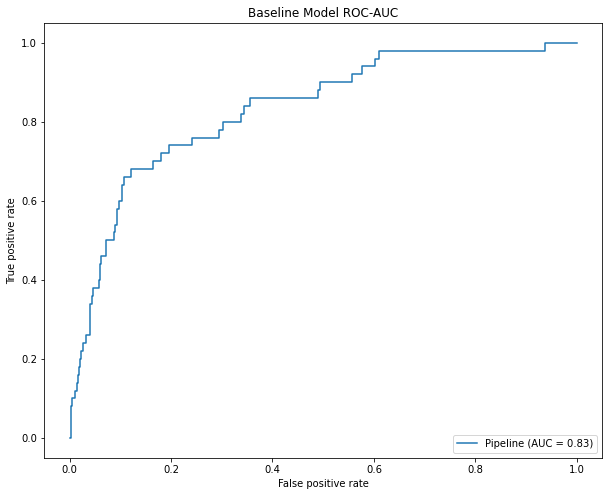

In [55]:
fig, ax = plt.subplots(figsize = (10,8))
plot_roc_curve(baseline_pipeline, X_test, y_test, ax = ax)
ax.set_ylabel('True positive rate')
ax.set_xlabel('False positive rate')
ax.set_title('Baseline Model ROC-AUC')
plt.show()

### _Comments on Model 1 (Baseline Model)_

Overall, these results are good.

As mentioned earlier, for this project, the recall score is the most important as false negatives are more costly than false positives (i.e., classifying someone as not being at risk for a stroke when they are is worse than classifying someone as being at risk for a stroke when they are not). 

A recall score of .80 is great, but more can be done to improve this score. 

Furthermore, with this model, there are 10 false negatives (as can be seen in the bottom left of the confusion matrix), which is low, but we want to minimize this value as much as possible. 

Finally, the ROC-AUC score of 0.84 is good, but we will try to increase this score in the following models.